# Wind Generation Analysis

Here we wanna try and figure out which months in Texas, are the most efficient months in terms of wind generation. We want to use this information so we can limit our API calls to the most efficient time period.

In [1]:
import pandas as pd

dfs = pd.read_html("https://en.wikipedia.org/wiki/Wind_power_in_Texas")

In [2]:
len(dfs)

13

In [3]:
gen_df = dfs[3]

In [4]:
gen_df

Texas Wind Generation (GWh, Million kWh)                               \
                                       Year   Total    Jan    Feb    Mar   
0                                      2001    1187     84    142     88   
1                                      2002    2656    287    195    238   
2                                      2003    2569    171    190    215   
3                                      2004    3137    253    251    293   
4                                      2005    4238    312    209    350   
5                                      2006    6671    535    425    552   
6                                      2007    9007    498    712    757   
7                                      2008   16224   1150   1180   1581   
8                                      2009   20026   1656   1719   1905   
9                                      2010   26251   1983   1672   2666   
10                                     2011   30547   2064   2528   2689   
11                                     2012   32214   3057   2599   3341   
12                                     2013   36415   2656   2984   3810   
13                                     2014   40005   3916   2656   3771   
14                                     2015   44883   3031   3268   2544   
15                                     2016   57530   4451   5120   5635   
16                                     2017   67061   5873   5828   7095   
17                                     2018   75700   6602   6041   7210   
18                                     2019   83621   6925   6639   6694   
19                                     2020   92439   7976   7714   7699   
20                                     2021  100057   7945   6349  10749   
21                                     2022  113994   8808   8681  11010   
22                                     2023   90994  11860  11131  12388   

                                                                     
      Apr    May    Jun   Jul   Aug   Sep     Oct      Nov      Dec  
0     115    103     92    76    56    76   123.0     89.0    143.0  
1     237    264    258   218   248   164   173.0    170.0    204.0  
2     260    209    213   240   193   196   168.0    228.0    286.0  
3     305    393    289   221   160   209   212.0    238.0    313.0  
4     432    385    451   309   261   315   348.0    325.0    541.0  
5     605    632    488   472   358   501   669.0    766.0    668.0  
6     798    596    577   436   867   741  1057.0    944.0   1024.0  
7    1596   1683   1748  1222   647   638  1455.0   1433.0   1891.0  
8    2028   1520   1613  1394  1458  1218  1933.0   1802.0   1780.0  
9    2731   2337   2562  1863  1658  1589  1830.0   2765.0   2595.0  
10   3066   3099   3357  2085  1955  1694  2671.0   2832.0   2507.0  
11   2969   2841   2615  2115  1872  2174  2742.0   2643.0   3246.0  
12   3761   3963   3379  2938  2130  2005  3082.0   3030.0   2677.0  
13   3997   3518   4209  2770  2551  2320  2981.0   3994.0   3322.0  
14   4099   4371   3411  4059  3218  3465  3661.0   4772.0   4984.0  
15   4737   5173   3782  5675  3702  3915  5451.0   4516.0   5373.0  
16   6929   6310   4839  4511  3694  4754  6003.0   5895.0   5330.0  
17   7477   7672   7689  4647  5968  4165  5599.0   6074.0   6556.0  
18   7839   7762   6290  6731  6489  6517  7455.0   6990.0   7290.0  
19   7950   8314   8859  7276  6689  5522  7838.0   7981.0   8621.0  
20   9496   9458   7363  5796  7615  7088  8930.0   8967.0  10301.0  
21  12339  12718  10161  9236  6730  6340  8088.0  10190.0   9693.0  
22  11385   8445   8979  9897  8783  8126     NaN      NaN      NaN

In [5]:
gen_df = pd.read_csv("windgen.csv")

In [6]:
print(gen_df.columns)

Index(['Year', 'Total', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
       'Sep', 'Oct', 'Nov', 'Dec'],
      dtype='object')


In [7]:
gen_df

,Year,Total,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2001,1187,84,142,88,115,103,92,76,56,76,123.0,89.0,143.0
1,2002,2656,287,195,238,237,264,258,218,248,164,173.0,170.0,204.0
2,2003,2569,171,190,215,260,209,213,240,193,196,168.0,228.0,286.0
3,2004,3137,253,251,293,305,393,289,221,160,209,212.0,238.0,313.0
4,2005,4238,312,209,350,432,385,451,309,261,315,348.0,325.0,541.0
5,2006,6671,535,425,552,605,632,488,472,358,501,669.0,766.0,668.0
6,2007,9007,498,712,757,798,596,577,436,867,741,1057.0,944.0,1024.0
7,2008,16224,1150,1180,1581,1596,1683,1748,1222,647,638,1455.0,1433.0,1891.0
8,2009,20026,1656,1719,1905,2028,1520,1613,1394,1458,1218,1933.0,1802.0,1780.0
9,2010,26251,1983,1672,2666,2731,2337,2562,1863,1658,1589,1830.0,2765.0,2595.0


In [8]:
gen_df = gen_df[(gen_df["Year"] < 2023)]


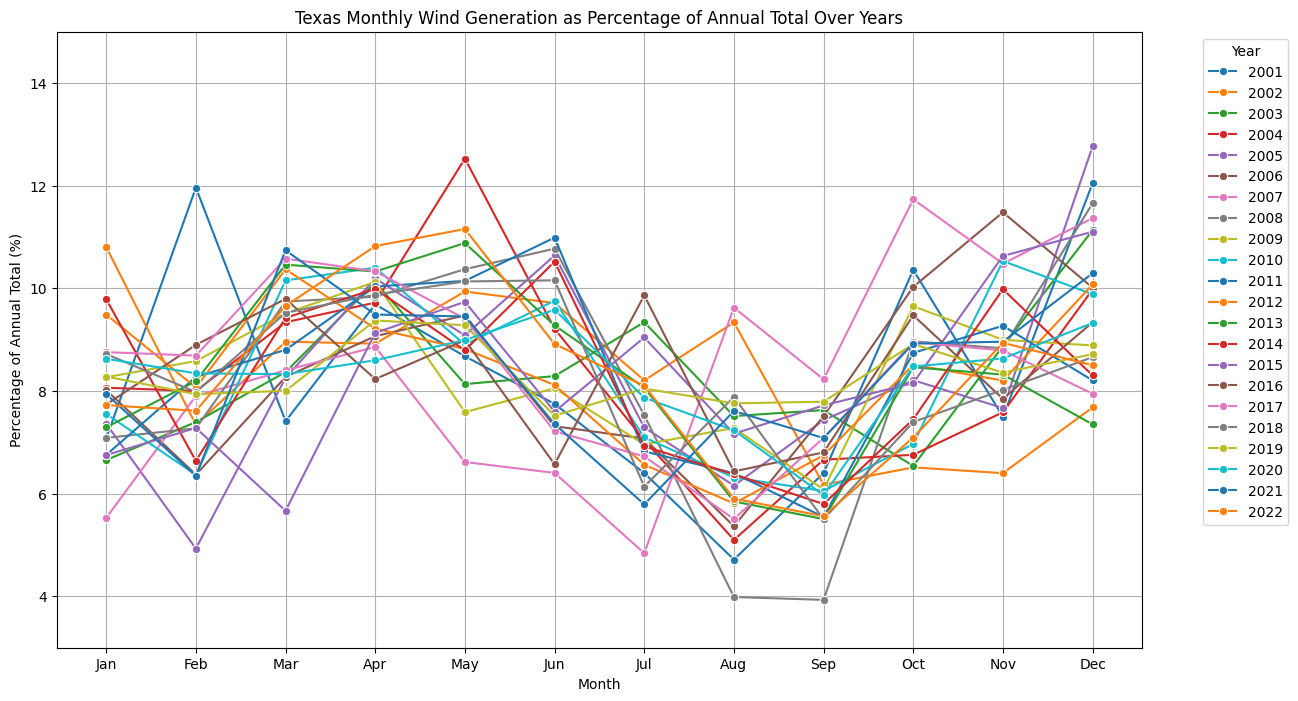

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

gen_df = gen_df.copy()


# Calculate percentage of annual total for each month
for month in ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']:
    gen_df.loc[:, f'{month}_Percentage'] = (gen_df[month] / gen_df['Total']) * 100


plt.figure(figsize=(14, 8))

# Plot each year's percentage for each month
for year in gen_df['Year']:
    sns.lineplot(x=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                 y=gen_df[gen_df['Year'] == year].loc[:, 'Jan_Percentage':'Dec_Percentage'].values.flatten(),
                 label=year, marker='o')


plt.xlabel('Month')
plt.ylabel('Percentage of Annual Total (%)')
plt.title('Texas Monthly Wind Generation as Percentage of Annual Total Over Years')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.ylim(3, 15)
# Show plot
plt.show()


## Report

We will limit our Weather Data from NOV through MAY. These are where the output is relatively maximal.